<a href="https://colab.research.google.com/github/jouhaina-nasri/TP2-Apprentissage-Artificielle/blob/main/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1- Créer Un DataFrame en utilisant les données de fichier ‘’Iris.csv” qui
contient notre dataSet.

In [ ]:
import pandas
url='https://drive.google.com/file/d/1lCrldn-uT1K6ctUC2xt7-hMjbMZ9Ft9r/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
D = pandas.read_csv(url,index_col='Id')

2-Afficher les 10 premières lignes du DataFrame.

In [ ]:
D.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


3-Afficher les dimensions du dataframe.

In [ ]:
D.shape

(150, 5)

4-Utiliser la bibliothèque python Seaborn pour visualiser les données en
fonction de la longueur des pétales et de largeur des sépales

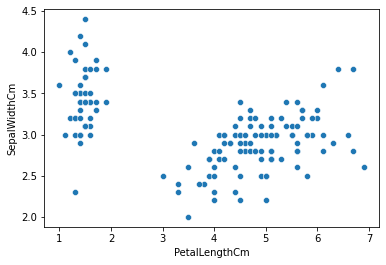

In [ ]:
import seaborn
res = seaborn.scatterplot(x=D['PetalLengthCm'], y=D['SepalWidthCm'])

5-Ecrire un script python permettant de labelliser les différentes espèces
d’iris.( Iris_Setosa → 0 , Iris_Versicolor→ 1 et Iris_Virginica → 2 )

In [ ]:
data = D[['SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' , 'PetalWidthCm']] 
update = D[['Species']].replace(['Iris-setosa' , 'Iris-versicolor' , 'Iris-virginica'] , [0,1,2])
data = pandas.concat([data , update] , axis=1)

6-Afficher du nouveau les 10 premières lignes du nouveau DataFrame
contenant les labels.


In [ ]:
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
6,5.4,3.9,1.7,0.4,0
7,4.6,3.4,1.4,0.3,0
8,5.0,3.4,1.5,0.2,0
9,4.4,2.9,1.4,0.2,0


7-Écrire un script python permettant la division de dataset en des données
d’apprentissage (70%) et des données de test (30%).

In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data , train_size=0.7)
x_train = train[['SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' , 'PetalWidthCm']] 
y_train = train.Species
x_test = test[['SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' , 'PetalWidthCm']] 
y_test = test.Species

8-Afficher les 10 premières données d’apprentissage et celles de test.

In [ ]:
x_train.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
75,6.4,2.9,4.3,1.3
19,5.7,3.8,1.7,0.3
109,6.7,2.5,5.8,1.8
107,4.9,2.5,4.5,1.7
40,5.1,3.4,1.5,0.2
63,6.0,2.2,4.0,1.0
112,6.4,2.7,5.3,1.9
138,6.4,3.1,5.5,1.8
53,6.9,3.1,4.9,1.5


In [ ]:
y_train.head(10)

Id
75     1
19     0
109    2
107    2
40     0
63     1
112    2
138    2
53     1
117    2
Name: Species, dtype: int64

In [ ]:
x_test.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
125,6.7,3.3,5.7,2.1
60,5.2,2.7,3.9,1.4
136,7.7,3.0,6.1,2.3
85,5.4,3.0,4.5,1.5
66,6.7,3.1,4.4,1.4
62,5.9,3.0,4.2,1.5
67,5.6,3.0,4.5,1.5
57,6.3,3.3,4.7,1.6
52,6.4,3.2,4.5,1.5


In [ ]:
y_test.head(10)

Id
125    2
60     1
136    2
85     1
66     1
62     1
67     1
57     1
52     1
108    2
Name: Species, dtype: int64

9-Ecrire un script python qui utilise un perceptron multicouche pour l’apprentissage des données avec un optimisateur (‘lbfgs’, epsilon=0.07 et nombre maximum d’itération=150).

In [ ]:
from sklearn.neural_network import MLPClassifier
classification = MLPClassifier(epsilon=0.07,hidden_layer_sizes=(4,),max_iter=150,solver="lbfgs")
classification.fit(x_train , y_train)

MLPClassifier(epsilon=0.07, hidden_layer_sizes=(4,), max_iter=150,
              solver='lbfgs')

10-Evaluer ce perceptron en affichant son “accuracy” et le temps de réponse

In [ ]:
prediction = classification.predict(x_test)
prediction

array([2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 0, 2, 0, 1, 1, 2, 1, 2, 0, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 1, 0,
       2])

In [ ]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(prediction,y_test))

Accuracy: 0.9111111111111111


11-Afficher la matrice de confusion associée à notre cas.

In [ ]:
#1er methode:
metrics.confusion_matrix(y_true=y_test, y_pred=prediction)

array([[ 8,  0,  0],
       [ 0, 18,  4],
       [ 0,  0, 15]])

In [ ]:
!pip install pretty-confusion-matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.4 MB 9.0 MB/s 
     |████████████████████████████████| 156 kB 53.4 MB/s 
     |████████████████████████████████| 103 kB 47.3 MB/s 
     |████████████████████████████████| 73 kB 1.5 MB/s 
     |████████████████████████████████| 199 kB 57.6 MB/s 
     |████████████████████████████████| 68 kB 7.3 MB/s 
     |████████████████████████████████| 41 kB 675 kB/s 
     |████████████████████████████████| 965 kB 74.5 MB/s 
     |████████████████████████████████| 295 kB 67.0 MB/s 
     |████████████████████████████████| 8.8 MB 37.9 MB/s 
     |████████████████████████████████| 98 kB 8.2 MB/s 
     |████████████████████████████████| 468 kB 51.2 MB/s 
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=c2148ecce24f7254abfb808109848202b7e7dca3de0a0d22fe47e9db0612b211
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc

/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

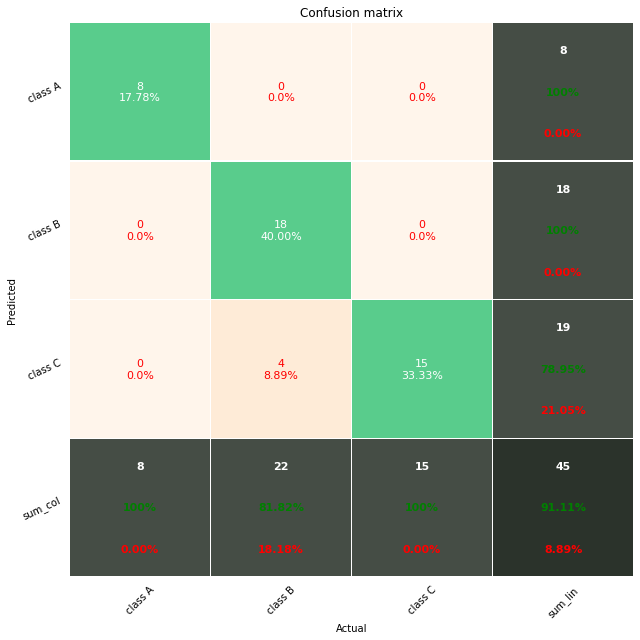

In [ ]:
#2eme methode
from pretty_confusion_matrix import pp_matrix_from_data
pp_matrix_from_data(y_test, prediction)

12-Selon les résultats affichés commenter le perceptron que vous avez utilisé.

la matrice de confusion est une matrice qui mesure la qualité d'un système de classification.
Les prédictions correctes et incorrectes sont mises en lumière et réparties par classe. Les résultats sont ainsi comparés avec les valeurs réelles.
L'axe des ordonnées répresente les prédictions, l'axe des abcisses répresente les valeurs réelles.

---


Dans notre cas, on trouve les valeurs de classe A sont prédites correctements car on a 100% True et 0% False, de meme pour la classe C.
Mais les valeurs du classe B ne sont pas prédites correctements car on a 81.82% True et 18.18% False.

13-On va ajouter le paramètre de taux d’apprentissage au niveau de
classifieur utilisé pour une valeur égale 0.7


In [ ]:
classification = MLPClassifier(epsilon=0.07, hidden_layer_sizes=(4,), learning_rate_init=0.7,max_iter=150, solver='lbfgs')
classification.fit(x_train , y_train)

MLPClassifier(epsilon=0.07, hidden_layer_sizes=(4,), learning_rate_init=0.7,
              max_iter=150, solver='lbfgs')

14-Nous allons étudier la variation du paramètre de taux d’apprentissage,
donc nous allons afficher la courbe d'évolution d’apprentissage et celle de test
en fonction de variation du taux d’apprentissage

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

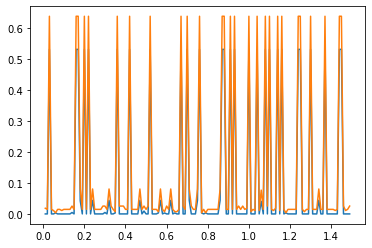

In [ ]:
TestValue=[]
variation=[]
TrainValue=[]
for i in range(1,150):

  appvalue=i/100
  variation.append(appvalue)

  model=MLPClassifier(hidden_layer_sizes=(4,),solver="lbfgs",epsilon=0.07,max_iter=150,learning_rate_init=appvalue)
  model=model.fit(x_train, y_train)

  appModel=model.predict(x_train)
  TrainValue.append(metrics.mean_squared_log_error(y_train,appModel))

  appTest=model.predict(x_test)
  TestValue.append(metrics.mean_squared_log_error(y_test,appTest))
  
  
plt.plot(variation,TrainValue,label="Evolution d’apprentissage")
plt.plot(variation,TestValue,label="Evolution de test")
plt.show()

15-Nous allons fixer un nombre d’itération égale à 10 fois le nombre fixé au
début. Quel est le phénomène constaté ? et comment pouvons- nous
surmonter celui-ci ?


In [ ]:
import matplotlib.pyplot as plt
classification = MLPClassifier(epsilon=0.07, hidden_layer_sizes=(4,), learning_rate_init=0.7,max_iter=1500, solver='lbfgs')
classification.fit(x_train , y_train)
apprentissage=classification.predict(x_train)
metrics.accuracy_score(apprentissage,y_train)

1.0

16-Tester d’autres classifieurs de type réseau de neurones
(Dynamique/Récurrent et Non récurrent) .


In [ ]:
from tensorflow import keras
from keras.layers import Dense,SimpleRNN
seq = keras.Sequential()
seq.add(Dense(len(x_train.columns),input_shape=(len(x_train.columns),),activation='relu'))
seq.add(Dense(1,activation='softmax'))
seq.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
seq = seq.fit(x_train, y_train)
seq

4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - acc: 0.2667


In [ ]:
sequence = keras.Sequential()
sequence.add(SimpleRNN(len(x_train.columns),return_sequences=True, return_state=True))
sequence.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
sequence

17-Dans notre cas de base de donnée Iris, est ce qu’il est intéressant d’avoir
un réseau de neurones récurrent ou non ? justifier vos réponses.

Un réseau de neurones récurrents est un réseau de neurones artificiels présentant des connexions récurrentes, utilise des sorties qui sont une combinaison non linéaire de ses entrées. Dans notre cas, on n'a pas interet à utiliser les réseaux de neurones récurrents.